In [1]:
import time
import random
import numpy as np
from scipy.optimize import curve_fit
import sys

sys.setrecursionlimit(10_000_000)

## Quick Sort Implementation

In [2]:
# Quick Sort Implementation

def quicksort(arr, low, high):
    if low < high:
        pivot_index = partition(arr, low, high)
        quicksort(arr, low, pivot_index)
        quicksort(arr, pivot_index + 1, high)

def partition(arr, low, high):

    pivot = arr[low]
    left = low + 1
    right = high
    done = False
    while not done:
        while left <= right and arr[left] <= pivot:
            left = left + 1
        while arr[right] >= pivot and right >= left:
            right = right - 1
        if right < left:
            done = True
        else:
            arr[left], arr[right] = arr[right], arr[left]

    arr[low], arr[right] = arr[right], arr[low]
    return right

# DEBUG
# a = [10, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
# a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# random.shuffle(a)
quicksort(a, 0, (len(a) - 1))
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## Making array sizes

In [17]:
# Finding decent array sizes that scale decently

array_sizes = [i + 5 for i in range(1_000)]
array_sizes

[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 1

## Measure Quick Sort

In [18]:

def lastInFirst(array_size):
    
    array = [i for i in range(1, array_size + 1)]
    array[0], array[array_size - 1] = array[len(array) - 1], array[0]
    # # DEBUG
    # print(f"Starting array is {array}")

    start = time.perf_counter()
    quicksort(array, 0, array_size - 1)
    stop = time.perf_counter()
    avg_time = stop - start
    # # DEBUG
    # print(f"For an array size of {array_size}, avearge quick_sort takes {avg_time} seconds")
    # print(f"Sorted array: {array}")

    return avg_time
    

def reverseSorted(array_size):

    array = [array_size + 1 - i for i in range(1, array_size + 1)]
    # # DEBUG
    # print(f"Starting array is {array}")

    start = time.perf_counter()
    quicksort(array, 0, array_size - 1)
    stop = time.perf_counter()
    avg_time = stop - start
    # # DEBUG
    # print(f"For an array size of {array_size}, avearge quick_sort takes {avg_time} seconds")
    # print(f"Sorted array: {array}")

    return avg_time

def normalSorted(array_size):

    array = [i for i in range(1, array_size + 1)]
    # DEBUG
    # print(f"Starting array is {array}")

    start = time.perf_counter()
    quicksort(array, 0, array_size - 1)
    stop = time.perf_counter()
    avg_time = stop - start
    # # DEBUG
    # print(f"For an array size of {array_size}, avearge quick_sort takes {avg_time} seconds")
    # print(f"Sorted array: {array}")

    return avg_time

def randomSorted(array_size):

    array = [i for i in range(1, array_size + 1)]
    random.shuffle(array)
    # # DEBUG
    # print(f"Starting array is {array}")

    start = time.perf_counter()
    quicksort(array, 0, array_size - 1)
    stop = time.perf_counter()
    avg_time = stop - start
    # # DEBUG
    # print(f"For an array size of {array_size}, avearge quick_sort takes {avg_time} seconds")
    # print(f"Sorted array: {array}")

    return avg_time


In [19]:
# Saving Times

last_in_first_times = []
for size in array_sizes:
    last_in_first_times.append(lastInFirst(size))

reverse_sorted_times = []
for size in array_sizes:
    reverse_sorted_times.append(reverseSorted(size))

sorted_times = []
for size in array_sizes:
    sorted_times.append(normalSorted(size))

random_times = []
for size in array_sizes:
    random_times.append(randomSorted(size))

## Curve fitting

In [20]:
def quadratic_model(x, a, b):
    return a * x ** 2 + b

def nlogn_model(x, a, b):
    return a * (x * np.log(x * b))

params_lift, _ = curve_fit(quadratic_model, array_sizes, last_in_first_times)
params_rst, _ = curve_fit(quadratic_model, array_sizes, reverse_sorted_times)
params_st, _ = curve_fit(quadratic_model, array_sizes, sorted_times)
params_rt, _ = curve_fit(nlogn_model, array_sizes, random_times)

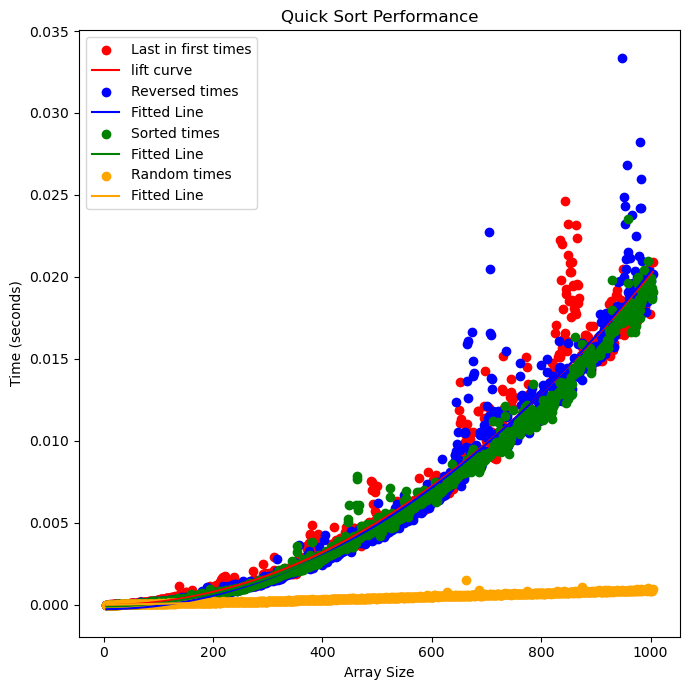

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (7, 7))

# plotting quicksort
ax.scatter(array_sizes, last_in_first_times, label='Last in first times', color= 'red')
ax.plot(array_sizes, quadratic_model(np.array(array_sizes), *params_lift), label='lift curve', color='red')

ax.scatter(array_sizes, reverse_sorted_times, label='Reversed times', color= 'blue')
ax.plot(array_sizes, quadratic_model(np.array(array_sizes), *params_rst), label='Fitted Line', color='blue')

ax.scatter(array_sizes, sorted_times, label='Sorted times', color= 'green')
ax.plot(array_sizes, quadratic_model(np.array(array_sizes), *params_st), label='Fitted Line', color='green')

ax.scatter(array_sizes, random_times, label='Random times', color= 'orange')
ax.plot(array_sizes, nlogn_model(np.array(array_sizes), *params_rt), label='Fitted Line', color='orange')

ax.set_title('Quick Sort Performance')
ax.set_xlabel("Array Size")
ax.set_ylabel("Time (seconds)")

ax.legend()

plt.tight_layout()
plt.show()